In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
loan_dataset = pd.read_csv('Loan Modelling Thera Bank.csv')
loan_dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
loan_dataset.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
loan_dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


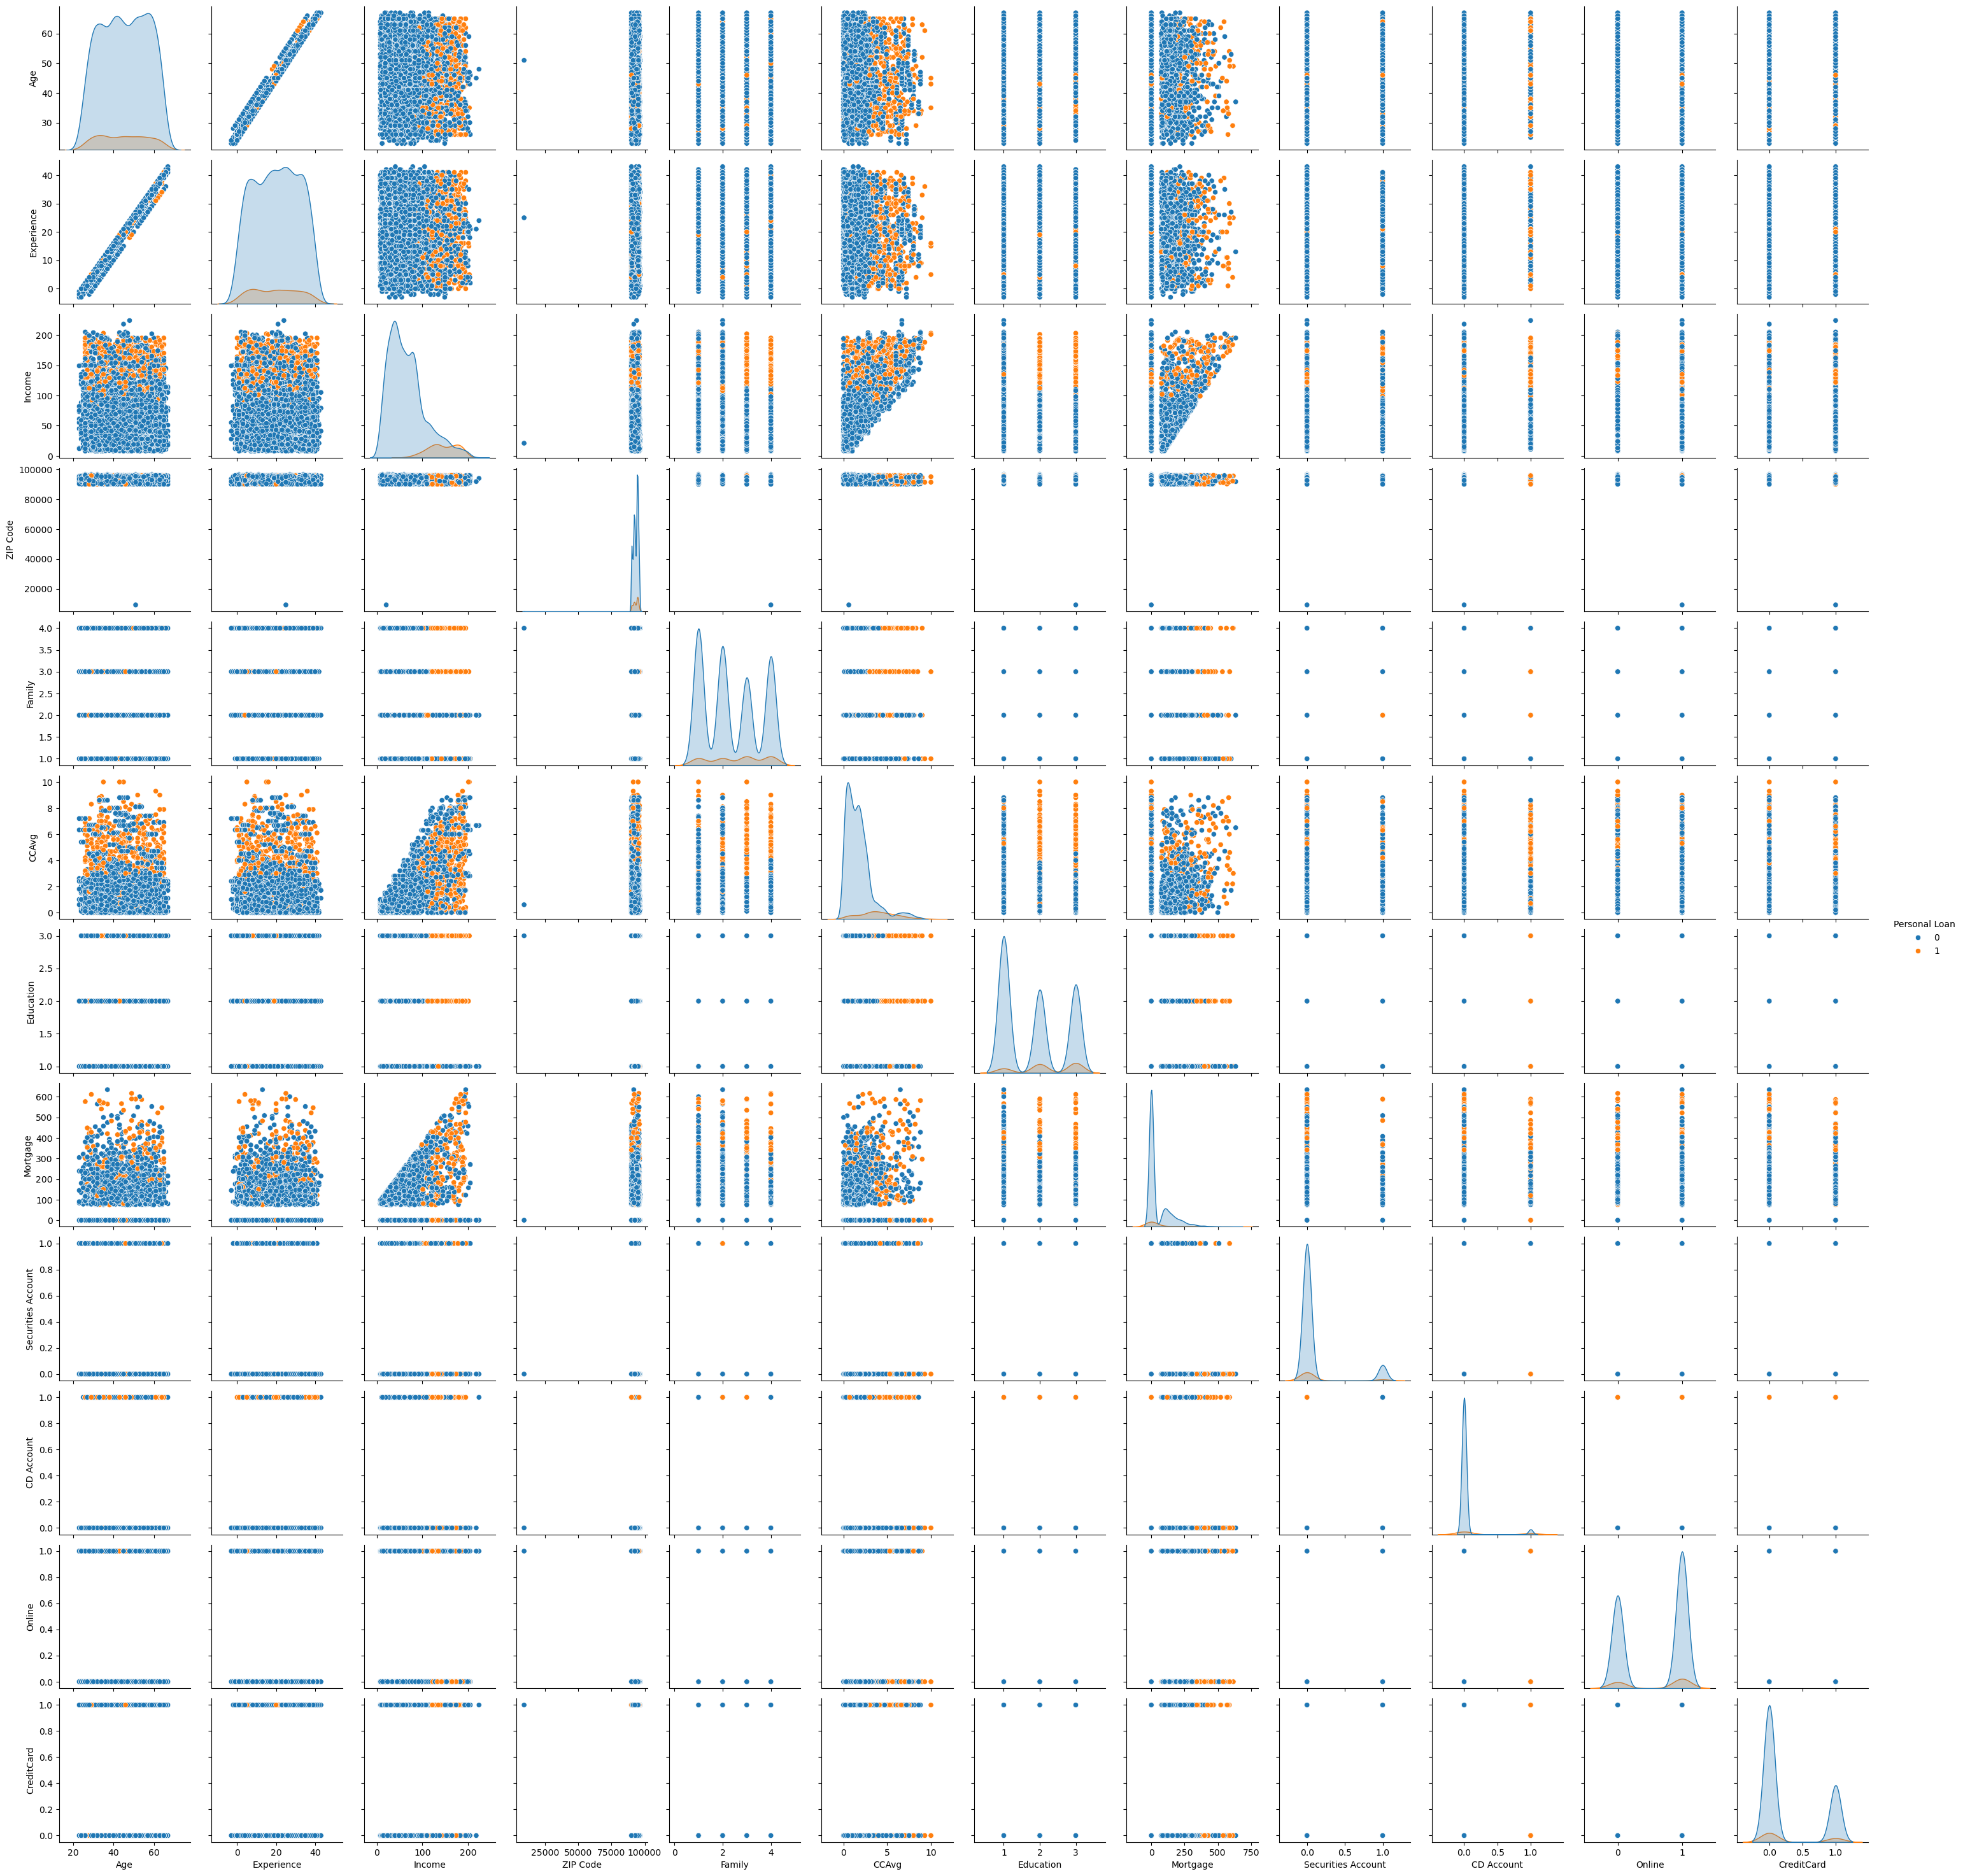

In [6]:
sns.pairplot(loan_dataset,
             hue = 'Personal Loan',
            vars = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
                    'Education', 'Mortgage', 'Securities Account',
                    'CD Account', 'Online', 'CreditCard'])

<Axes: ylabel='count'>

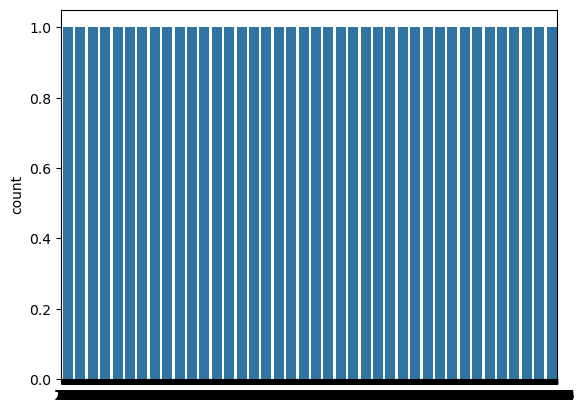

In [7]:
sns.countplot(loan_dataset['Personal Loan'])

<Axes: >

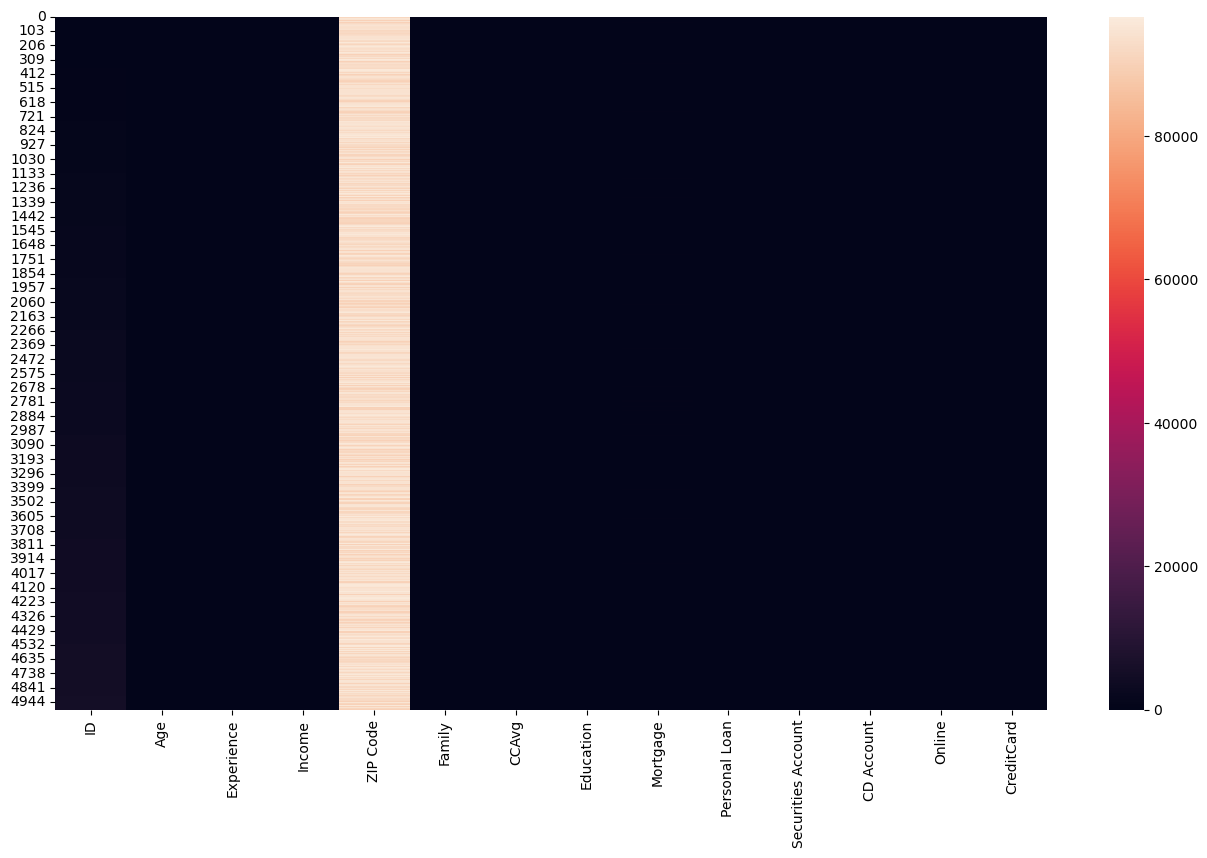

In [8]:
plt.figure(figsize = (16, 9))
sns.heatmap(loan_dataset)

<Axes: >

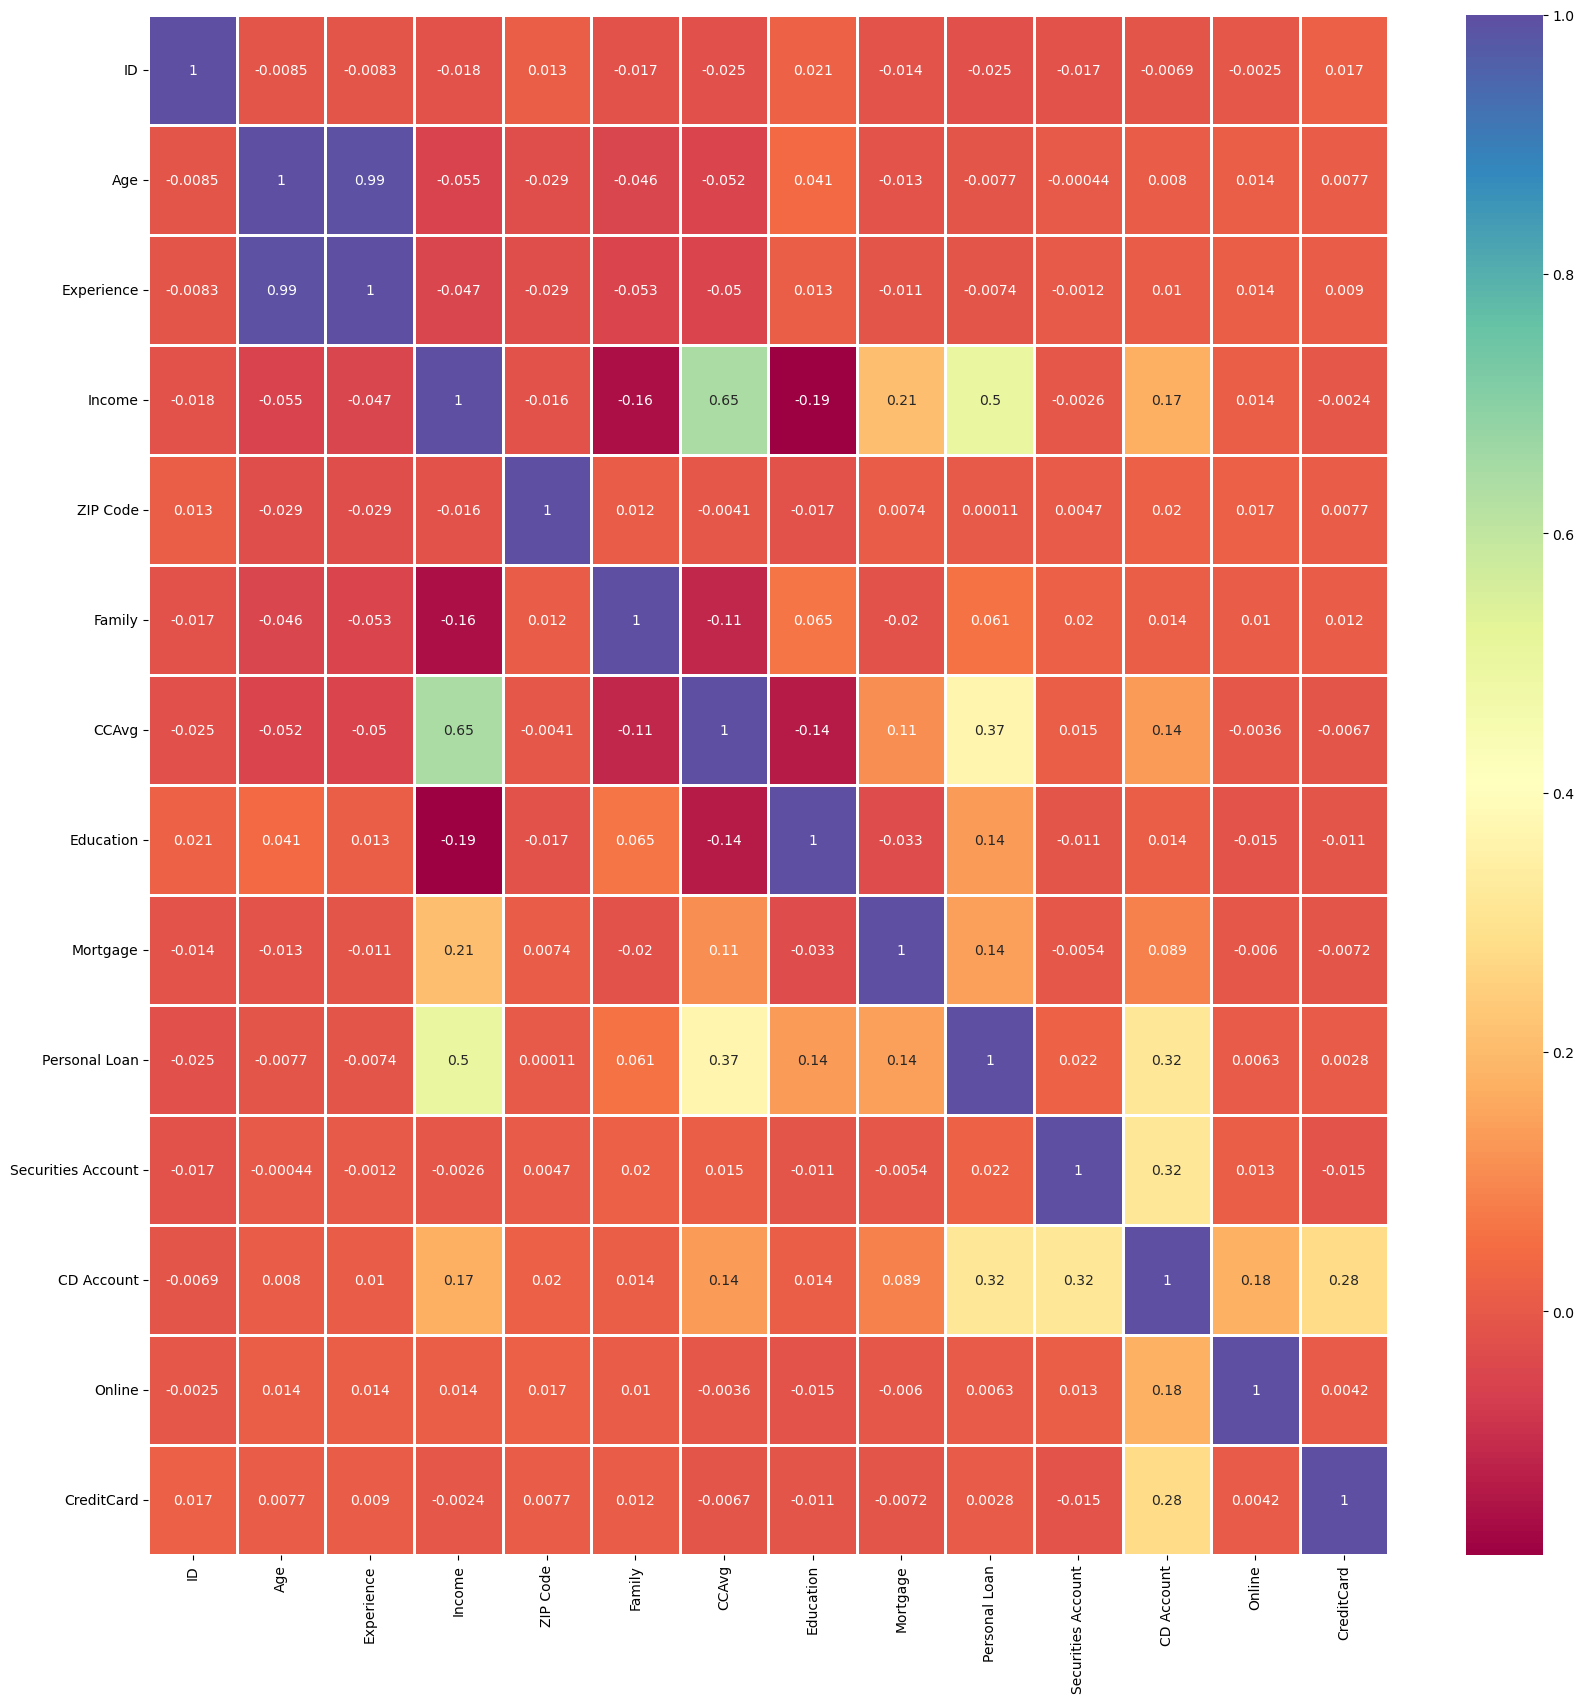

In [9]:
plt.figure(figsize = (20, 20))
sns.heatmap(loan_dataset.corr(), annot = True, cmap = 'Spectral', linewidths = 2)

In [10]:
X = loan_dataset.drop(['Personal Loan', 'ID'], axis = 1)
X = (X - X.min()) / (X.max() - X.min())
X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.000000,1.0,0.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.000000,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.000000,0.0,0.0,0.0,0.0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.148148,0.954731,0.000000,0.19,1.0,0.000000,0.0,0.0,1.0,0.0
4996,0.159091,0.152174,0.032407,0.947174,1.000000,0.04,0.0,0.133858,0.0,0.0,1.0,0.0
4997,0.909091,0.913043,0.074074,0.958463,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0
4998,0.954545,0.934783,0.189815,0.924242,0.666667,0.05,0.5,0.000000,0.0,0.0,1.0,0.0


In [11]:
X.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.507691,0.502274,0.304510,0.959946,0.465467,0.193794,0.440500,0.088974,0.104400,0.06040,0.596800,0.294000
std,0.260526,0.249303,0.213119,0.024293,0.382554,0.174766,0.419935,0.160179,0.305809,0.23825,0.490589,0.455637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.272727,0.282609,0.143519,0.945732,0.000000,0.070000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,0.500000,0.259259,0.963203,0.333333,0.150000,0.500000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.727273,0.717391,0.416667,0.976610,0.666667,0.250000,1.000000,0.159055,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
X2 = loan_dataset.drop(['Personal Loan', 'ID'], axis = 1)
X2 = (X2 - X2.mean()) / X2.var()
X2

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-0.154777,-0.145267,-0.011691,-0.000454,1.217495,-0.110643,-1.248972,-0.005461,9.576628,-1.06407,-2.479663,-1.416147
1,-0.002575,-0.008399,-0.018769,-0.000680,0.458269,-0.143384,-1.248972,-0.005461,9.576628,-1.06407,-2.479663,-1.416147
2,-0.048236,-0.038814,-0.029623,0.000348,-1.060184,-0.307087,-1.248972,-0.005461,-1.116347,-1.06407,-2.479663,-1.416147
3,-0.078676,-0.084437,0.012376,0.000213,-1.060184,0.249504,0.168703,-0.005461,-1.116347,-1.06407,-2.479663,-1.416147
4,-0.078676,-0.092040,-0.013578,-0.000405,1.217495,-0.307087,0.168703,-0.005461,-1.116347,-1.06407,-2.479663,3.400680
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.124337,-0.130059,-0.015938,-0.000101,-1.060184,-0.012421,1.586379,-0.005461,-1.116347,-1.06407,1.675268,-1.416147
4996,-0.116727,-0.122455,-0.027735,-0.000248,1.217495,-0.503530,-1.248972,0.002755,-1.116347,-1.06407,1.675268,-1.416147
4997,0.134407,0.143676,-0.023488,-0.000029,-0.300957,-0.536271,1.586379,-0.005461,-1.116347,-1.06407,-2.479663,-1.416147
4998,0.149627,0.151280,-0.011691,-0.000693,0.458269,-0.470790,0.168703,-0.005461,-1.116347,-1.06407,1.675268,-1.416147


<Axes: >

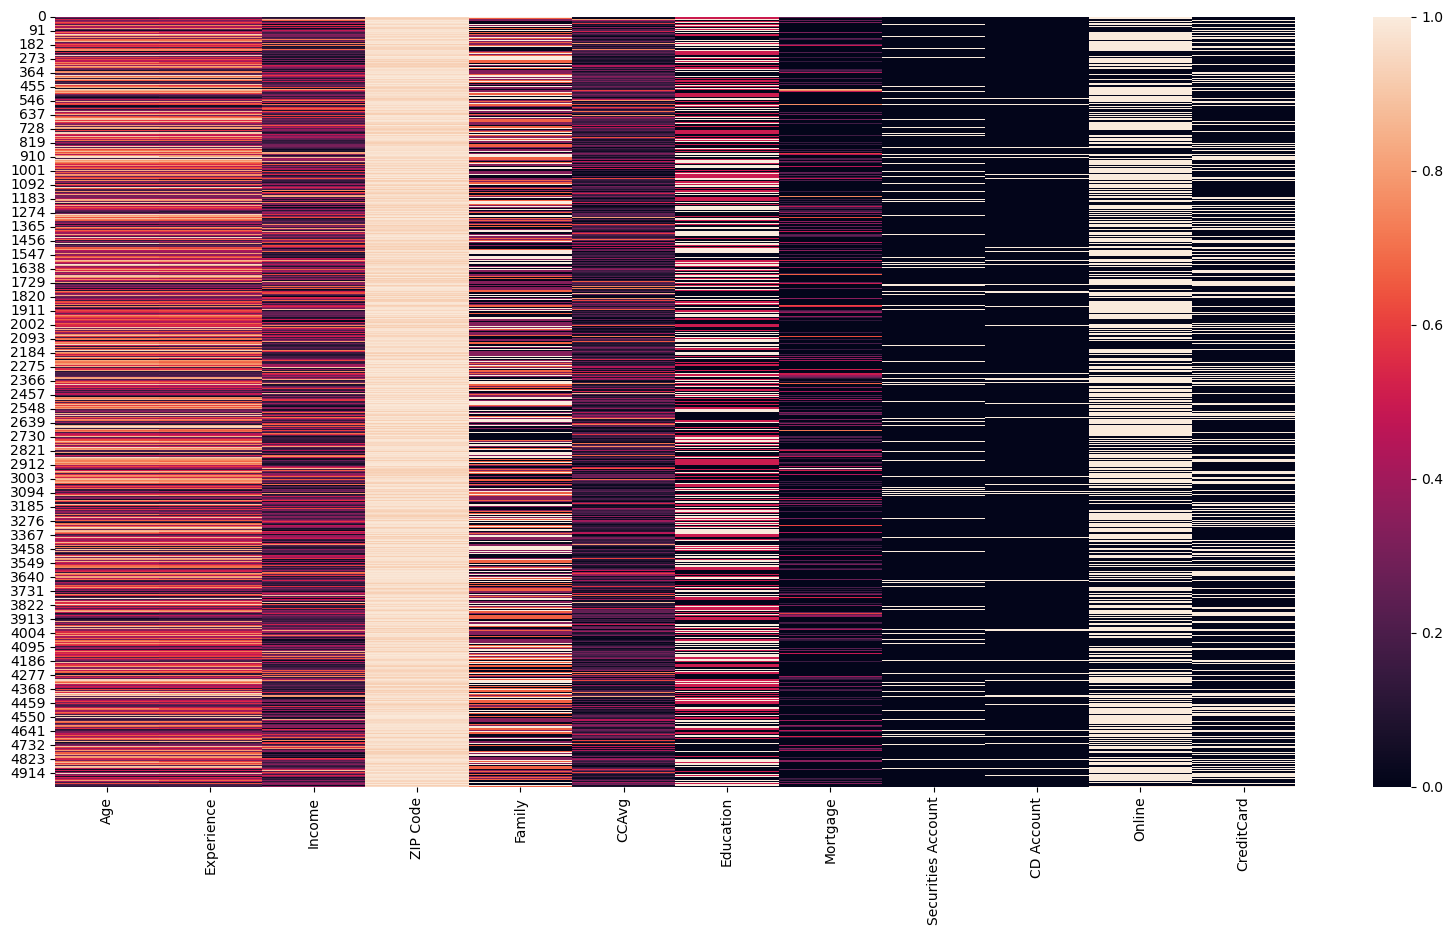

In [13]:
plt.figure(figsize = (20, 10))
sns.heatmap(X)

In [14]:
y = loan_dataset['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print("Training type: ", X_train.shape, y_train.shape)
print("Testing type: ", X_test.shape, y_test.shape)

Training type:  (4000, 12) (4000,)
Testing type:  (1000, 12) (1000,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2, weights = 'distance')
knn_classifier.fit(X_train, y_train)

,n_neighbors,10
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred_knn = knn_classifier.predict(X_test)
print('Accuary: ', accuracy_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))

Accuary:  0.952
Precision:  0.9166666666666666
Recall:  0.5


## 10.1. Lựa chọn số lượng láng giềng


## 10.1 Lựa chọn số lượng láng giềng


### Thay đổi số lượng láng giềng tìm giá trị cho kết quả phân loại tốt nhất

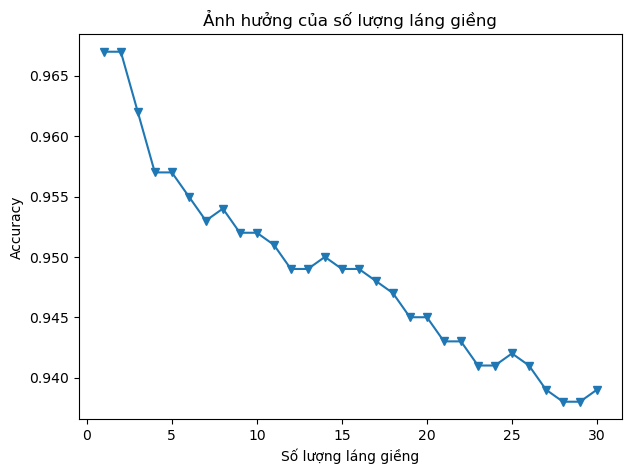

In [18]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

Acc = []
Pre = []
Rec = []

for k in range(1, 31):
    knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test)
    Acc.append(accuracy_score(y_test, y_pred_knn))
    Pre.append(precision_score(y_test, y_pred_knn))
    Rec.append(recall_score(y_test, y_pred_knn))

fig, axs = plt.subplots(figsize=(7, 5))


axs.plot(np.arange(1, 31), Acc, marker = 'v')
axs.set_xlabel("Số lượng láng giềng")
axs.set_ylabel("Accuracy")
axs.set_title("Ảnh hưởng của số lượng láng giềng")

plt.show()

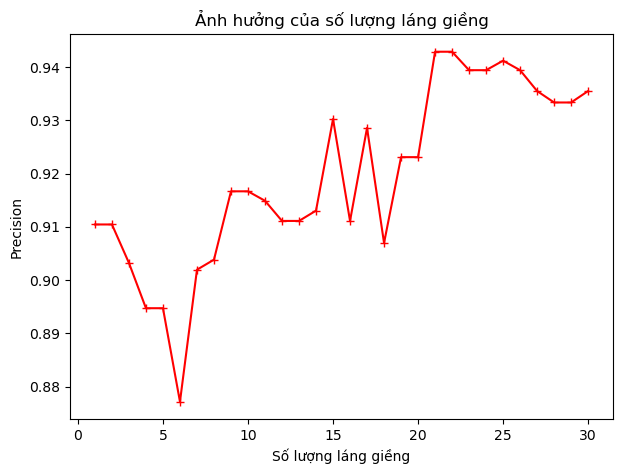

In [19]:
fig, axs = plt.subplots(figsize=(7, 5))


axs.plot(np.arange(1, 31), Pre, marker = '+', color = 'red')
axs.set_xlabel("Số lượng láng giềng")
axs.set_ylabel("Precision")
axs.set_title("Ảnh hưởng của số lượng láng giềng")

plt.show()

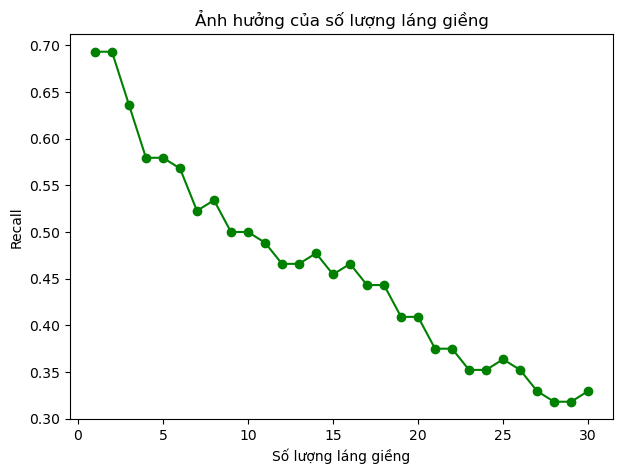

In [20]:
fig, axs = plt.subplots(figsize=(7, 5))


axs.plot(np.arange(1, 31), Rec, marker = 'o', color = 'green')
axs.set_xlabel("Số lượng láng giềng")
axs.set_ylabel("Recall")
axs.set_title("Ảnh hưởng của số lượng láng giềng")

plt.show()

## 10.2 Lựa chọn thuộc tính

### Thử loại bỏ từng thuộc tính ra khỏi dữ liệu xem chúng ảnh hưởng như thế nào tới kết quả phân loại.

In [33]:
Proper = ['None', 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
          'Education', 'Mortgage', 'Securities Account',
          'CD Account', 'Online', 'CreditCard']

Acc = []
Pre = []
Rec = []

dem = 0

for P in Proper:

    if P == 'None': X = loan_dataset.drop(['Personal Loan', ], axis = 1)
    else: X = loan_dataset.drop(['Personal Loan', P], axis = 1)
    
    X = (X - X.min()) / (X.max() - X.min())
    y = loan_dataset['Personal Loan']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
    knn_classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    
    y_pred_knn = knn_classifier.predict(X_test)
    Acc.append(accuracy_score(y_test, y_pred_knn))
    Pre.append(precision_score(y_test, y_pred_knn))
    Rec.append(recall_score(y_test, y_pred_knn))

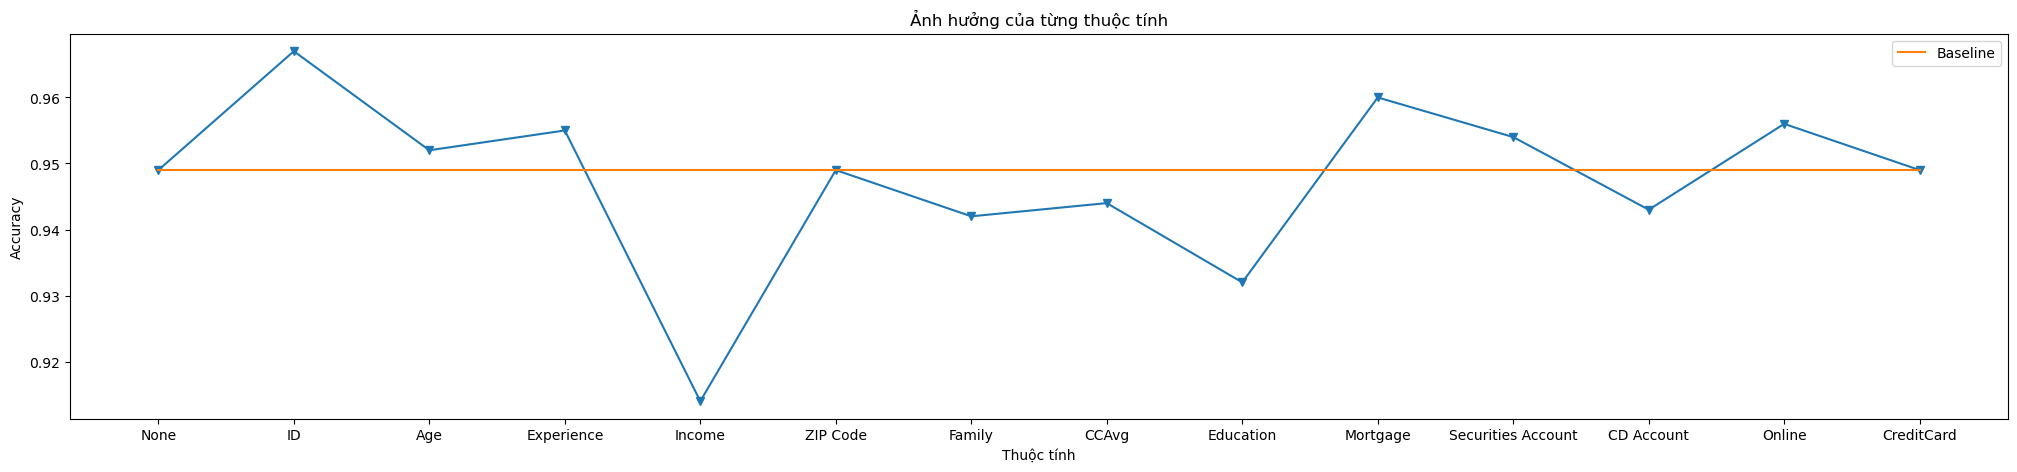

In [34]:
plt.figure(figsize = (25, 5))
plt.plot(Proper, Acc, marker = "v")
plt.xlabel("Thuộc tính")
plt.plot(Proper, [Acc[0] for _ in range(len(Acc))], marker = ' ', label = 'Baseline')
plt.ylabel("Accuracy")
plt.title("Ảnh hưởng của từng thuộc tính")
plt.legend()
plt.show()


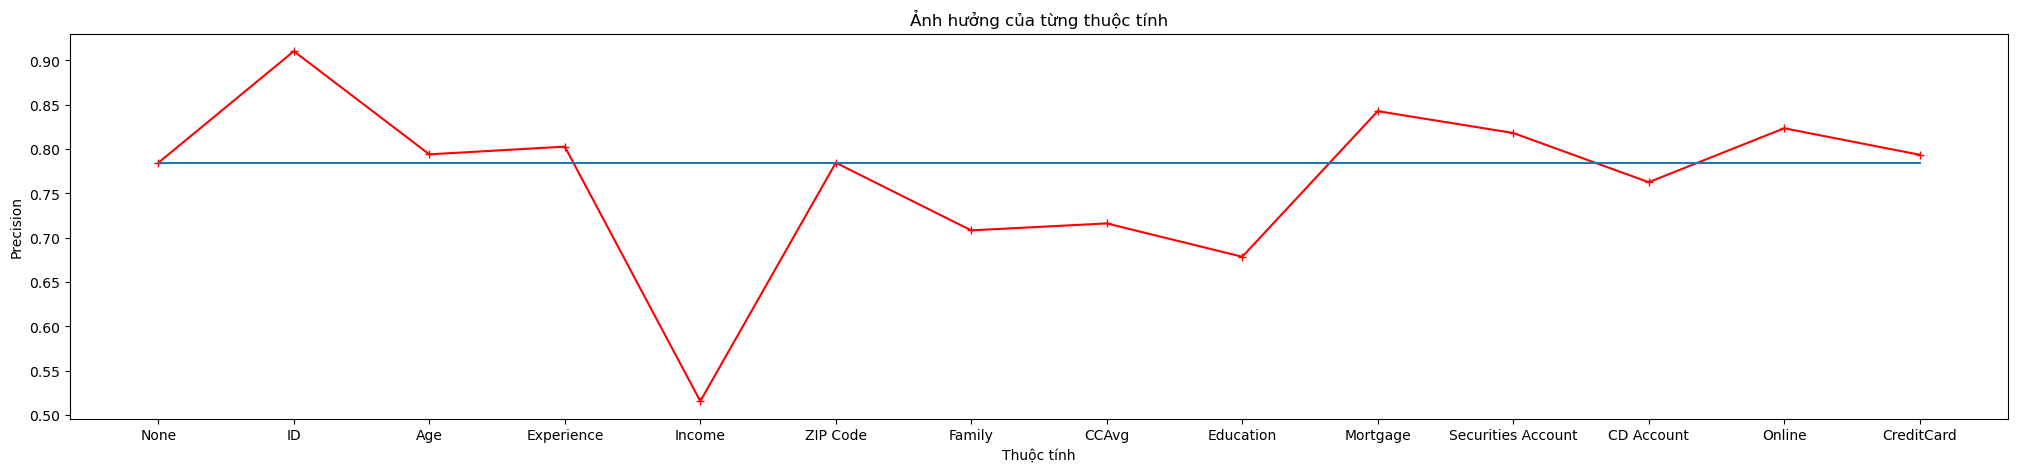

In [35]:
plt.figure(figsize = (25, 5))
plt.plot(Proper, Pre, marker = "+", color = "red")
plt.plot(Proper, [Pre[0] for _ in range(len(Pre))], marker = ' ', label = 'Baseline')
plt.xlabel("Thuộc tính")
plt.ylabel("Precision")
plt.title("Ảnh hưởng của từng thuộc tính")
plt.show()

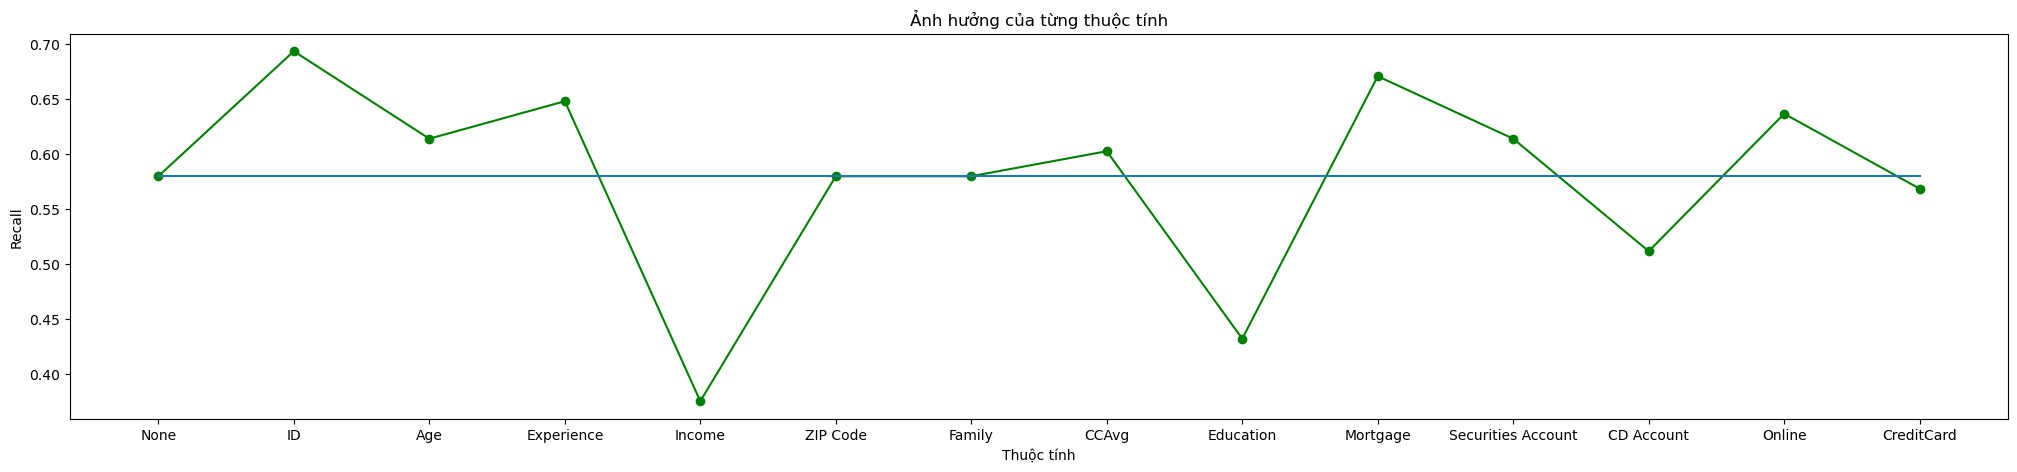

In [36]:
plt.figure(figsize = (25, 5))
plt.plot(Proper, Rec, marker = "o", color = "green")
plt.plot(Proper, [Rec[0] for _ in range(len(Rec))], marker = ' ', label = 'Baseline')
plt.xlabel("Thuộc tính")
plt.ylabel("Recall")
plt.title("Ảnh hưởng của từng thuộc tính")
plt.show()

### Dựa vào 3 biểu đồ ta thấy các thuộc tính như là ['Income', 'Family', CCavg', "Education', CD Account'] khi bị bỏ đi thì kết quả bị ảnh hưởng rất là nhiều. Điều này chứng tỏ đây là những thuộc tính nên sử dụng để đạt được kết quả tốt nhất


In [37]:
X = loan_dataset.drop(['Personal Loan', 'Personal Loan', 'ID', 'Age', 'Experience',
                       'ZIP Code', 'Mortgage', 'Securities Account', 'Online', 'CreditCard'], axis = 1)
X = (X - X.min()) / (X.max() - X.min())
y = loan_dataset['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
knn_classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2, weights = 'distance')
knn_classifier.fit(X_train, y_train)


y_pred_knn = knn_classifier.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))


Accuracy:  0.986
Precision:  0.9512195121951219
Recall:  0.8863636363636364


## 10.3. Lựa chọn tính hàm khoảng cách


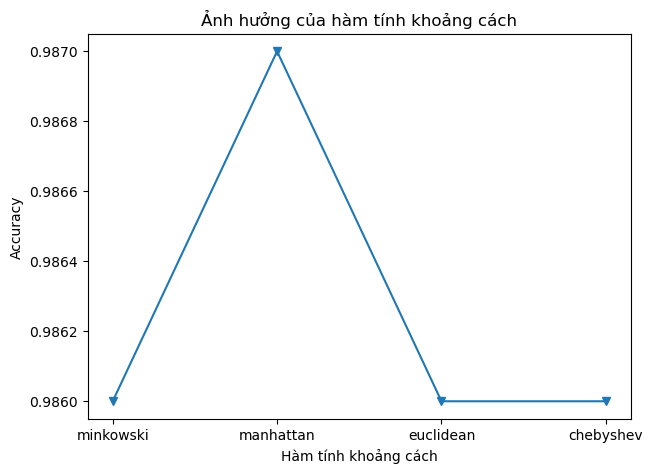

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

Acc = []
Pre = []
Rec = []

A = ['minkowski', 'manhattan', 'euclidean', 'chebyshev']

for k in A:
    knn_classifier = KNeighborsClassifier(n_neighbors = 2, metric = k, p = 2, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test)
    Acc.append(accuracy_score(y_test, y_pred_knn))
    Pre.append(precision_score(y_test, y_pred_knn))
    Rec.append(recall_score(y_test, y_pred_knn))

fig, axs = plt.subplots(figsize=(7, 5))


axs.plot(A, Acc, marker = 'v')
axs.set_xlabel("Hàm tính khoảng cách")
axs.set_ylabel("Accuracy")
axs.set_title("Ảnh hưởng của hàm tính khoảng cách")

plt.show()

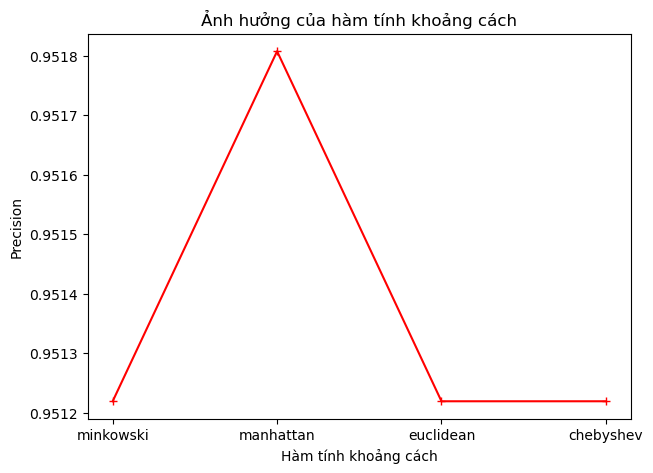

In [40]:
fig, axs = plt.subplots(figsize=(7, 5))


axs.plot(A, Pre, marker = '+', color = 'red')
axs.set_xlabel("Hàm tính khoảng cách")
axs.set_ylabel("Precision")
axs.set_title("Ảnh hưởng của hàm tính khoảng cách")

plt.show()

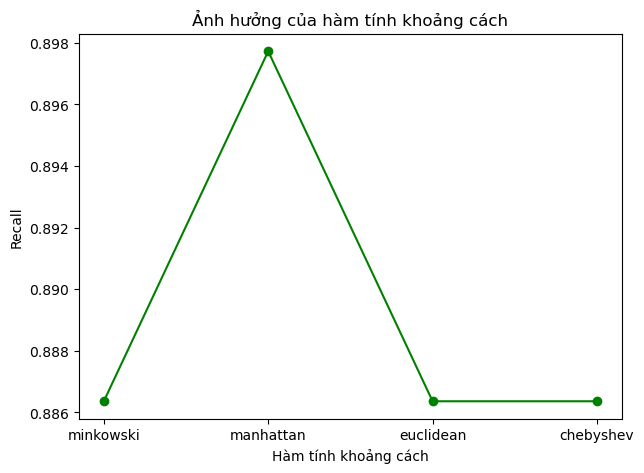

In [42]:
fig, axs = plt.subplots(figsize=(7, 5))


axs.plot(A, Rec, marker = 'o', color = 'green')
axs.set_xlabel("Hàm tính khoảng cách")
axs.set_ylabel("Recall")
axs.set_title("Ảnh hưởng của hàm tính khoảng cách")

plt.show()

In [43]:
X = loan_dataset.drop(['Personal Loan', 'Personal Loan', 'ID', 'Age', 'Experience',
                       'ZIP Code', 'Mortgage', 'Securities Account', 'Online', 'CreditCard'], axis = 1)
X = (X - X.min()) / (X.max() - X.min())
y = loan_dataset['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
knn_classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'manhattan', p = 2, weights = 'distance')
knn_classifier.fit(X_train, y_train)


y_pred_knn = knn_classifier.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))

Accuracy:  0.987
Precision:  0.9518072289156626
Recall:  0.8977272727272727
